<a href="https://colab.research.google.com/github/carlxen/CCADMACL_EXERCISES_COM232/blob/main/Exercise2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISE 2B

Imagine you are a data scientist working for an international development organization. Your team wants to understand how countries differ in terms of economy, health, and social well-being. You have access to a dataset containing multiple indicators for countries worldwide, such as GDP per capita, life expectancy, child mortality, and population.

Your task is to discover natural groupings of countries using hierarchical clustering. By examining these clusters, you can identify patterns such as:

- Which countries are economically developed or developing

- How social and health indicators vary across regions

- Surprising similarities between countries from different continents

Answer each question by completing the corresponding code cell. **Do not remove or reorder cells.**



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/IMF_advanced_economies_and_UN_least_developed_countries.svg/960px-IMF_advanced_economies_and_UN_least_developed_countries.svg.png"/>

## Dataset feature description

 - child mort - Death of children under 5 years of age per 1000 live births

- exports - Exports of goods and services per capita. Given as %age of the GDP per capita
- health - Total health spending per capita. Given as %age of GDP per capita
- import - Imports of goods and services per capita. Given as %age of the GDP per capita
- income - Net income per person
- inflation - The measurement of the annual growth rate of the Total GDP
- life_expec - The average number of years a new born child would live if the current mortality patterns are to remain the same
- total_fer - The number of children that would be born to each woman if the current age-fertility rates remain the same.
- gdpp - The GDP per capita. Calculated as the Total GDP divided by the total population.

In [82]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset

df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 1. Import Required Libraries
Import the core libraries needed for data analysis, visualization, and clustering.

In [83]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


## 2. Load the Dataset
Upload the CSV file for *the* **Country Data** dataset.

In [84]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)


Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 3. Exploring the Dataset

Display the first 10 rows of the dataset `(5 pts)`

- Show the initial records to understand the dataset's structure and variables.

In [85]:
# put your answer here
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


Display the shape of the dataset `(5 pts)`
- How many rows (countries) and how many features does the dataset contain?

In [86]:
# put your answer here
df.shape

(167, 10)

Show summary statistics using `describe()`. `(5 pts)`

In [87]:
# put your answer here
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Check for missing values. `(5 pts)`

In [88]:
# put your answer here
df.isna().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


## 4. Data Preprocessing

Select only the numerical columns for clustering `(5 pts)`
- Exclude any non-numeric fields, such as 'Country Name' or categorical variables.

In [89]:
# put your answer here
df_numerical = df.select_dtypes(include=['number'])
df_numerical

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Standardize the selected numerical features `(5 pts)`

- This ensures all features contribute equally to the distance calculations used in clustering.

In [90]:
# put your answer here
df_numerical_scaled = StandardScaler().fit_transform(df_numerical)
df_numerical_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

## 5. Exploratory Data Analysis

Generate a correlation heatmap
- Visualize the relationships between socioeconomic indicators. `(10 pts)`

<function matplotlib.pyplot.show(close=None, block=None)>

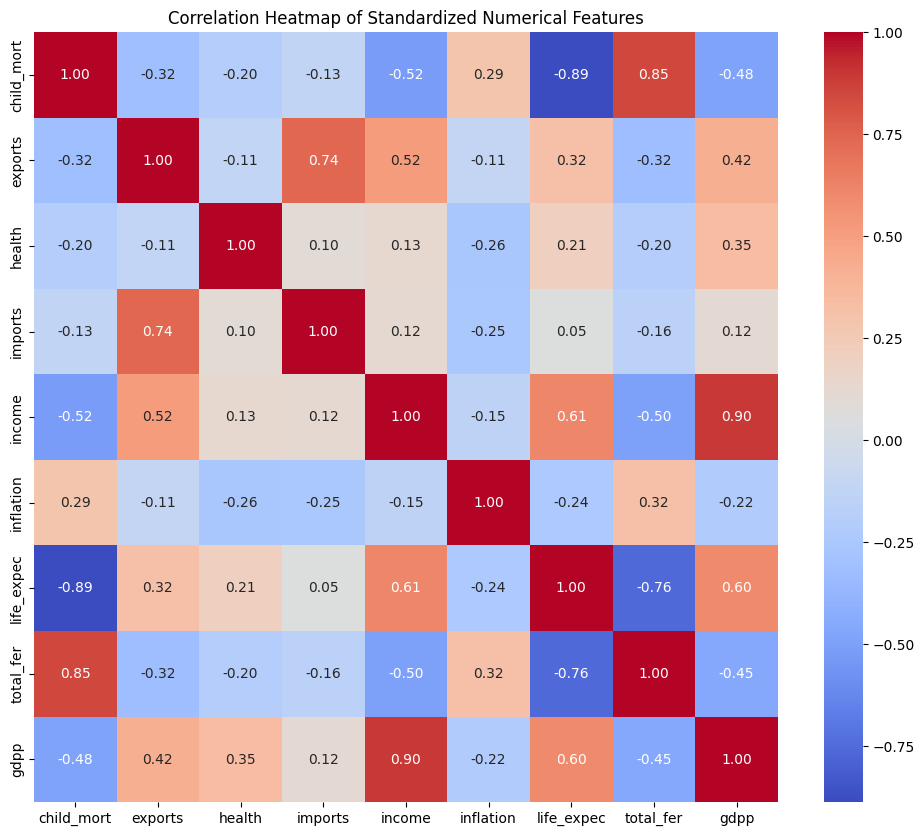

In [91]:
# put your answer here
df_numerical_scaled_analysis = pd.DataFrame(df_numerical_scaled, columns= df_numerical.columns)

plt.figure(figsize=(12, 10))
sns.heatmap(df_numerical_scaled_analysis.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Standardized Numerical Features')
plt.show

In [92]:
dfnew = pd.DataFrame()
dfnew['medical'] = (data['child_mort'] / data['child_mort'].mean()) + (data['life_expec'] / data['life_expec'].mean()) + (data['total_fer'] / data['total_fer'].mean()) + (data['health'] / data['health'].mean())
dfnew['trading'] = (data['imports'] / data['imports'].mean()) + (data['exports'] / data['exports'].mean())
dfnew['economy'] = (data['gdpp'] / data['gdpp'].mean()) + (data['income'] / data['income'].mean()) + (data['inflation'] / data['inflation'].mean())
dfnew.head()

,medical,trading,economy
0,-3.231521e+16,-5.648781e+15,-1.626958e+16
1,1.322867e+16,-1.998561e+15,2.576901e+16
2,7.261090e+15,-2.786464e+15,-7.938823e+16
3,-5.276274e+16,3.047023e+15,-1.318917e+17
4,1.828946e+16,2.554381e+15,5.458197e+16


Identify 2–3 variables that appear strongly correlated `(10 pts)`
- Explain your observations in the text cell below.

In response of many features available and to represent it well, the average of the medical rate of the each country, its trading and its economic value is therfore averaged into a numerical value to make it doable and correct. Therefore the features I chose are mine: Medical, Trading, and Economic

## 6. Hierarchical Clustering

Compute and display a dendrogram using the linkage method `(10 pts)`
- Use `'ward'` linkage to minimize variance within clusters.

Text(0, 0.5, 'Euclidean')

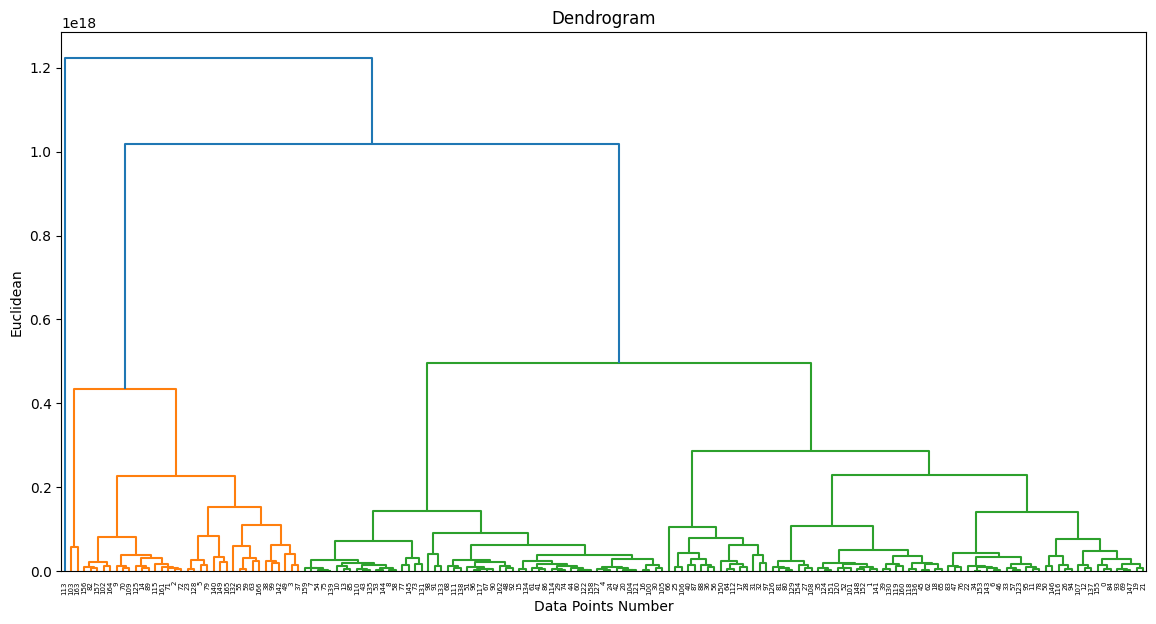

In [123]:
Z = linkage(dfnew, method='ward')
plt.figure(figsize=(14,7))
den = dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean')

Based on the dendrogram, choose a reasonable number of clusters `(5 pts)`
- Write your chosen number below and explain your reasoning.


I chose 3 clusters by looking at the dendrogram and identifying where a horizontal line could cut through three distinct vertical lines. This usually indicates three well-separated groups of data points before they merge into larger clusters. This visual break often suggests an optimal number of clusters that are both distinct and meaningful.

Perform Agglomerative Clustering using your chosen cluster count `(10 pts)`

- Attach the cluster labels back to the original dataframe.

In [119]:
data =dfnew.to_numpy()

model = AgglomerativeClustering(n_clusters=3).fit(data)

labels = model.labels_

## 7. Visualizing Cluster Results

Create a scatter plot using any 2 meaningful features, colored by cluster `(10 pts)`
- Choose variables that make socioeconomic sense (e.g., GDP per capita vs. life expectancy).

In [121]:
import plotly.express as px
fig = px.scatter_3d(dfnew, x='medical', y='trading', z='economy', color='Cluster')
fig.show()

Describe the characteristics of each cluster `(5 pts)`
- What patterns can you infer about country groupings?

Cluster 0 ('Developed Countries'): Countries in this cluster typically show higher average 'economy' and 'medical' values, and y good 'trading' activity. Visually, these countries would form a distinct group with higher values along the 'economy' and 'medical' axes. While in Cluster 1 ('Least Developed Countries'): This cluster often represents countries with lower average 'economy' and 'medical' values. Their 'trading' values might also be lower or exhibit a different pattern. In the scatter plot, this group would likely occupy a region with lower values on most axes. And finally, Cluster 2 (Possibly 'Developing Countries'): This cluster would likely fall somewhere between Cluster 0 and Cluster 1, indicating moderate 'economy', 'medical', and 'trading' values. They might show signs of development but are not yet at the level of the 'Developed Countries'. On the plot, they would be a middle group.

## 8. Reflection
Write a short reflection on what socioeconomic insights hierarchical clustering revealed about global development patterns. `(10 pts)`


Socioeconomic pattern in society can greatly describe what the country can achieve. Those of whose trading is significant can say that the life expectancy is much more longer as the economy is thriving whereas otherwise the other countries can be left vulnerable to stagnation, poverty, and shorter lifespans. When resources are scarce and opportunities limited, the population often struggles with inadequate healthcare, poor education, and unstable governance. This imbalance creates a cycle where nations with strong economic foundations continue to prosper, while those without remain trapped in systemic challenges. Ultimately, the socioeconomic pattern not only reflects the present condition of a country but also shapes its future trajectory, determining whether it rises to global influence or remains constrained by internal limitations.
